<a href="https://colab.research.google.com/github/DSNortsev/Algorithms/blob/master/LeetCode_april_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TECH DOSE**

Types of DP:
* Knapsack (O/1, Bounded, Unbounded)
* LCS (Longest Common Subsequence)
* LIS (Longest Increasing Subsequence)
* Matrix chain multiplication 
* DP on grid
* Kadane's Algorithm
* Others

**1. Single number**

In [ ]:
numbers = [2, 4, 2, 4 , 3, 5]

def single_number(numbers):
  result = []
  count_duplicates = {}
  for number in numbers:
    if count_duplicates.get(number):
      count_duplicates[number] += 1
    else:
      count_duplicates[number] = 1
  
  for k, v in count_duplicates.items():
      if v == 1:
        result.append(k)
  return result


single_number(numbers)

[3, 5]

**2. Happy Number** 


In [ ]:
def is_happy(number):
  seen_number = set()

  while True:
      total_sum = 0
      value = 0
      while number > 0:
        number, digit  = divmod(number, 10)
        total_sum += digit ** 2
      
      if total_sum == 1:
        return True
      elif total_sum in seen_number:
        return False
      seen_number.add(total_sum)
      number = total_sum


print(is_happy(19))
print(is_happy(25))

True
False


**3. Longest Sum contiguous subarray**

In [ ]:
def longest_contiguous_subarray(array):
  max_end = 0
  max_total = float('-inf')

  for element in array:
    max_end = max_end + element
    if max_end < element:
      max_end = element
    if max_total < max_end:
      max_total = max_end
  return max_total

longest_contiguous_subarray([-2,-3, 4, -1, -2, 1, 5, -3])

7

**4. Move Zeroes**
Move all zeros to the right 

Example:
Input: [1, 0, 3, 0, 12]

Output: [1, 3, 12, 0, 0]

In [ ]:
def move_zeroes(array: list) -> list:
  """
    Move all zeros to the right
  """
  elm_count = len(array)
  # left is pointer to last zero
  # right is moving towards the end =
  left, right = 0, 0
  
  if elm_count in (0,1):
      return array

  while right < elm_count:
    if array[right] == 0:
      right += 1
    else:
      array[left], array[right] = array[right], array[left]
      right += 1
      left += 1
  return array 

In [ ]:
array1 = [1, 0, 3, 0, 12]
array3 = [1]
array2 = []

print(move_zeroes(array1))
print(move_zeroes(array2))
print(move_zeroes(array3))

[1, 3, 12, 0, 0]
[]
[1]


**5. Best time to buy and sekk stock**

You can buy and sell or skip stocks 

Exmaple:

Input: [7, 1, 5, 3, 6, 4]

Output: 7



In [ ]:
def max_profit(prices: list) -> int:
  """
    Calculate the max profit by buying, selling or skipping the stocks.
    The stock can;t be bought or sold at the same day.
  """
  total_profit = 0
  for indx in range(1,len(prices)):
    if prices[indx] > prices[indx-1]:
       total_profit += prices[indx] - prices[indx-1]
  return total_profit

In [ ]:
# we can not sell on 7 and buy on 4
# (5 - 1) + (6 - 3) = 7
prices1 = [7, 1, 5, 3, 6, 4]
prices2 = [1, 2, 3, 4, 5]
prices3 = [5, 4, 3, 2, 1]

print(max_profit(prices1))
print(max_profit(prices2))
print(max_profit(prices3))

7
4
0


**6. Group Anagrams**

eat and tea are anagrams

In [ ]:
def group_anagrams(words: list) -> list:
  anagrams = {}
  for word in words:
    sorted_letters = "".join(sorted(word))
    if anagrams.get(sorted_letters):
      anagrams[sorted_letters].append(word)
    else:
      anagrams[sorted_letters] = [word]
  
  return list(anagrams.values())

In [ ]:
words = ['eat', 'tea', 'tan', 'ate', 'nat', 'bat']
print(group_anagrams(words))

[['eat', 'tea', 'ate'], ['tan', 'nat'], ['bat']]


**7. Counting elements**

Counting numnber of x of (x+1) is present in an array.

In [ ]:
def count_elements(numbers: list) -> int:
  """
    Counting numnber of x of (x+1) is present in an array.
  """
  total_count = len(numbers)
  sorted_numbers = sorted(numbers)
  left, right, count = 0, 1, 0

  while right < total_count:
    if sorted_numbers[right] == sorted_numbers[left] + 1:
      count += right - left
      left = right
      right += 1
    elif sorted_numbers[right] == sorted_numbers[left]:
      right += 1
    else:
      left = right
      right += 1
  return count

In [ ]:
numbers = [1, 3, 2, 3, 5, 0]
# [0, 1, 2, 3, 3, 5], so count would be 3 which is 0-1, 1-2, 2-3
print(count_elements(numbers))

3


**8. Middle of link list**



In [ ]:
def middle_of_link_list(array: list) -> list:
  total_elements = len(array)

  if total_elements <= 2:
    return array
  
  indx = total_elements // 2
  if total_elements % 2 == 0:
    return [array[indx-1], array[indx]]
  return [array[indx]]

In [ ]:
print(middle_of_link_list([]))
print(middle_of_link_list([1]))
print(middle_of_link_list([1, 2]))
print(middle_of_link_list([1,2,3]))
print(middle_of_link_list([1,2,3,4]))

[]
[1]
[1, 2]
[2]
[2, 3]


**9.Backspcae string compare**

\# means backspace remoing an character

ab#cd# = ac

ac# = a

In [ ]:
def backspace_string_compare(string1: str, string2: str) -> bool:
  processed_str = {
    "result1": '',
    "result2": ''
  }

  for indx, string in enumerate([string1, string2],1):
    for character in string:
      if character.islower():
        processed_str[f'result{indx}'] += character
      else:
        processed_str[f'result{indx}'] = processed_str[f'result{indx}'][:-1]   
  return processed_str['result1'] == processed_str['result2']

In [ ]:
string1 = 'ab#cd#'
string2 = 'ac#d#c'
print(backspace_string_compare(string1, string2))

True


**10.Diameter of Binary Tree**


In [ ]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def diameterOfBinaryTree(self, root: Optional[TreeNode]) -> int:
        height,diameter=self.help(root)
        return diameter
    
    def help(self,root):
        if not root:
            return 0,0
        left_height,left_diam=self.help(root.left)
        right_height,right_diam=self.help(root.right)
        height=max(left_height,right_height)+1
        return height,max(left_height+right_height,left_diam,right_diam)

**11.Last stone weight**


In [ ]:
from typing import List

def last_stone_weight(stones: List[int]) -> int:
  while len(stones) > 1:
    stones = sorted(stones)
    x = stones.pop(-1)
    y = stones.pop(-1)
    if x != y:
      stones.append(x - y)
  return  stones[0] if stones else 0

In [ ]:
# O(nlogn) with Heap
from typing import List
from heapq import heappush, heappop

def last_stone_weight(stones: List[int]) -> int:
    heap = []
    for stone in stones: # O(n)
        heappush(heap, -stone) # O(logn)
    print(heap)
    
    while len(heap) > 1:
        y = heappop(heap)
        x = heappop(heap)
        
        if x > y: heappush(heap, y - x)
            
    return abs(heappop(heap)) if heap else 0


In [ ]:
stones1 = [2, 7, 4, 10]
stones2 = [2, 7]
stones3 = [3]
stones4 = []

print(last_stone_weight(stones1))
print(last_stone_weight(stones2))
print(last_stone_weight(stones3))
print(last_stone_weight(stones4))

[-10, -7, -4, -2]
1
[-7, -2]
5
[-3]
3
[]
0


**12.Contiguous array**


In [ ]:
def find_max_length_binary(binary_array: list) -> int:
  sum = 0 
  longest_subarray = 0
  sum_dictioary = {}

  for i in range(len(binary_array)):
    sum += 1 if binary_array[i] != 0 else -1

    if sum == 0:
      longest_subarray = i + 1 if longest_subarray < i + 1 else longest_subarray
    elif sum in sum_dictioary:
      longest_subarray = max(longest_subarray, i - sum_dictioary[sum])
    else:
      sum_dictioary[sum] = i
  return longest_subarray


In [ ]:
array1 = [0,1]
array2 = [0,1,0,1,0,1]
array3 = [0,1,0,1,0,0]

print(find_max_length_binary(array1))
print(find_max_length_binary(array2))
print(find_max_length_binary(array3))

2
6
4


**13.Perfrom string shifts**

You are given a string s containing lowercase English letters, and a matrix shift, where shift[i] = [directioni, amounti]:

    directioni can be 0 (for left shift) or 1 (for right shift).
    amounti is the amount by which string s is to be shifted.
    A left shift by 1 means remove the first character of s and append it to the end.
    Similarly, a right shift by 1 means remove the last character of s and add it to the beginning.

Return the final string after all operations.

```
Input: s = "abcdefg", shift = [[1,1],[1,1],[0,2],[1,3]]
Output: "efgabcd"
Explanation:  
[1,1] means shift to right by 1. "abcdefg" -> "gabcdef"
[1,1] means shift to right by 1. "gabcdef" -> "fgabcde"
[0,2] means shift to left by 2. "fgabcde" -> "abcdefg"
[1,3] means shift to right by 3. "abcdefg" -> "efgabcd"
```

 

In [ ]:
def string_shift(string: str, vectors: list) -> str:
  val = 0
  result = ''

  for vector in vectors:
    # 0 is left rotation and negative value 
    # 1 is right rotation and postive value
    val += -vector[1] if vector[0] == 0 else vector[1]

  length = len(string)
  val %= length
  print(val)
  if val > 0:
    # Right rotation
    result = string[length-val:] + string[:length-val]
  elif val < 0:
    # Left roration
    # Remove negative sign
    val = abs(val)
    result = string[length-val:] + string[:length-val]
  return result  

In [ ]:
string = "abcdefg"
vectors = [[1,1],[1,1],[0,2],[1,3]]
print(string_shift(string, vectors))

3
efgabcd


**14.Product of array except self**

In [ ]:
import math 

def product_of_array(array: list) -> list:
  total_product = 1
  for element in array:
    total_product *= element
  
  return [total_product//element for element in array]

In [ ]:
input1 = []
input2 = [1]
input3 = [1, 2]
input4 = [1,2,3,4]

print(product_of_array(input1))
print(product_of_array(input2))
print(product_of_array(input3))
print(product_of_array(input4))

[]
[1]
[2, 1]
[24, 12, 8, 6]


**15. Valid parenthesis String**

In [ ]:
def check_valid_string(string: str) -> bool:
  open, star = [], []
  length = len(string)
  for indx in range(length):
    if string[indx] == '(':
      open.append(indx)
    elif string[indx] == '*':
      star.append(indx)
    else:
      if open:
        # First pop from open stack
        open.pop()
      elif star:
        # Pop from star stack
        star.pop()
      else:
        # Can't balance the string
        return False

  # Now processing leftover openning brackets
  while open:
    if not star:
      return False
    elif open[-1] < star[-1]:
      open.pop()
      star.pop()
    else:
      return False
  return True

In [ ]:
string1 = "()"
string2 =  "(*)"
string3 =  "(*))"
string4 = ")(*))"

print(check_valid_string(string1))
print(check_valid_string(string2))
print(check_valid_string(string3))
print(check_valid_string(string4))

True
True
True
False


**16.Number of Islands**

Given an m x n 2D binary grid grid which represents a map of '1's (land) and '0's (water), return the number of islands.

An island is surrounded by water and is formed by connecting adjacent lands horizontally or vertically. You may assume all four edges of the grid are all surrounded by water.

In [ ]:
from typing import List

def num_islands(grid: List[List[str]]) -> int:
  num_islands = 0

  if not grid or not grid[0]:
    return 0

  for i,row in enumerate(grid):
    for j,cell in enumerate(row):
      if cell == "1":
        num_islands += 1
        grid = delete_island(grid, i, j)
        print(grid)
  return num_islands

def delete_island(grid, i, j):
  if grid[i][j] == "1":
    grid[i][j] = "0"
    if i > 0:
      # Up
      grid = delete_island(grid,i-1,j)
    if i < len(grid)-1:
      #Down
      grid = delete_island(grid,i+1,j)
    if j > 0:
      # Left
      grid = delete_island(grid,i,j-1)
    if j < len(grid[0])-1:
      # Right
      grid = delete_island(grid,i,j+1)
  return grid

In [ ]:
grid1 = [
  ["1","1","0","0","0"],
  ["1","1","0","0","0"],
  ["0","0","1","0","0"],
  ["0","0","0","1","1"]
]

grid2 = [
  ["1","1","1","1","0"],
  ["1","1","0","1","0"],
  ["1","1","0","0","0"],
  ["0","0","0","0","0"]
]

grid3 = []
grid4 = [[]]

print(num_islands(grid1))
print(num_islands(grid2))
print(num_islands(grid3))
print(num_islands(grid4))

[['0', '0', '0', '0', '0'], ['0', '0', '0', '0', '0'], ['0', '0', '1', '0', '0'], ['0', '0', '0', '1', '1']]
[['0', '0', '0', '0', '0'], ['0', '0', '0', '0', '0'], ['0', '0', '0', '0', '0'], ['0', '0', '0', '1', '1']]
[['0', '0', '0', '0', '0'], ['0', '0', '0', '0', '0'], ['0', '0', '0', '0', '0'], ['0', '0', '0', '0', '0']]
3
[['0', '0', '0', '0', '0'], ['0', '0', '0', '0', '0'], ['0', '0', '0', '0', '0'], ['0', '0', '0', '0', '0']]
1
0
0


**17. Minimum path sum**

Given a m x n grid filled with non-negative numbers, find a path from top left to bottom right, which minimizes the sum of all numbers along its path.

Note: You can only move either down or right at any point in time.

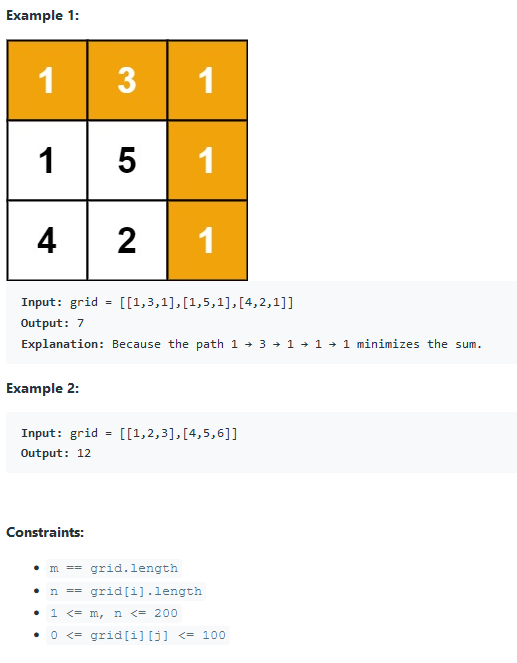


In [ ]:
from typing import List

def min_path_sum(grid: List[List[int]]) -> int:
  """
    :type grid: List[List[int]]
    :rtype: int
  """
  row, col = len(grid), len(grid[0])
  dis = [ [0 for c in range(col)] for r in range(row)]
  dis[0][0] = grid[0][0]
  # Going down first row
  for i in range(1, row):
    dis[i][0] = dis[i-1][0] + grid[i][0]
  # Going right first column
  for i in range(1, col):
    dis[0][i] = dis[0][i-1] + grid[0][i]
  # Fill out the reset
  for i in range(1, row):
    for j in range(1, col):
      dis[i][j] = grid[i][j] + min(dis[i-1][j], dis[i][j-1])
  return dis[-1][-1]

In [ ]:
grid1 = [
  [1,3,1],
  [1,5,1],
  [4,2,1]
]

grid2 = [
  [1,2,3],
  [4,5,6]
]

print(min_path_sum(grid1))
print(min_path_sum(grid2))

7
12


**18.Search in rotated sorted array**

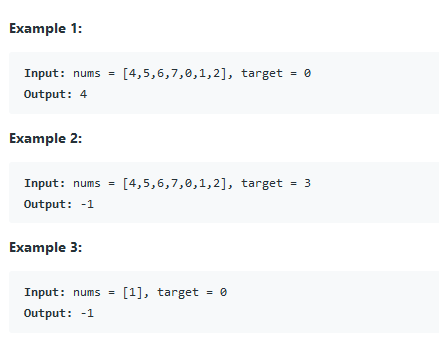

In [ ]:
# Formula: If a sorted array is shifted, if you take the middle, always one side will be sorted. Take the recursion according to that rule.

# 1- take the middle and compare with target, if matches return.
# 2- if middle is bigger than left side, it means left is sorted
# 2a- if [left] < target < [middle] then do recursion with left, middle - 1 (right)
# 2b- left side is sorted, but target not in here, search on right side middle + 1 (left), right
# 3- if middle is less than right side, it means right is sorted
# 3a- if [middle] < target < [right] then do recursion with middle + 1 (left), right
# 3b- right side is sorted, but target not in here, search on left side left, middle -1 (right)

def search(nums: List[int], target: int) -> int:
  """
  Rule of thumb: If a sorted array is shifted, if you take the middle, 
  always one side will be sorted. Take the recursion according to that rule
  """

  low, high = 0, len(nums) - 1

  while low <= high:
      
      mid = low + (high-low) // 2
      print(f"low {low}, high {high}, mid {mid}")
            
      # 1- take the middle and compare with target, if matches return.
      if nums[mid] == target:
          return mid
      
      # 2- if middle is bigger than left side, it means left is sorted
      elif nums[low] <= nums[mid]:
          if target >= nums[low] and target < nums[mid]:
              high = mid - 1
          else:
              low = mid + 1
      # 3- if middle is lower than left side, it means right is sorted
      else:
          if target > nums[mid] and target <= nums[high]:
              low = mid + 1
          else:
              high = mid - 1
  return -1


In [ ]:
nums1 = [4,5,6,7,0,1,2]
target1 = 0

nums2 = [4,5,6,7,0,1,2]
target2 = 3

nums3 = [1]
target3 = 0

print(search(nums1, target1))
print(search(nums2, target2))
print(search(nums3, target3))


low 0, high 6, mid 3
low 4, high 6, mid 5
low 4, high 4, mid 4
4
low 0, high 6, mid 3
low 4, high 6, mid 5
low 6, high 6, mid 6
-1
low 0, high 0, mid 0
-1


**19. Construct binary search tree from preoder traversal**

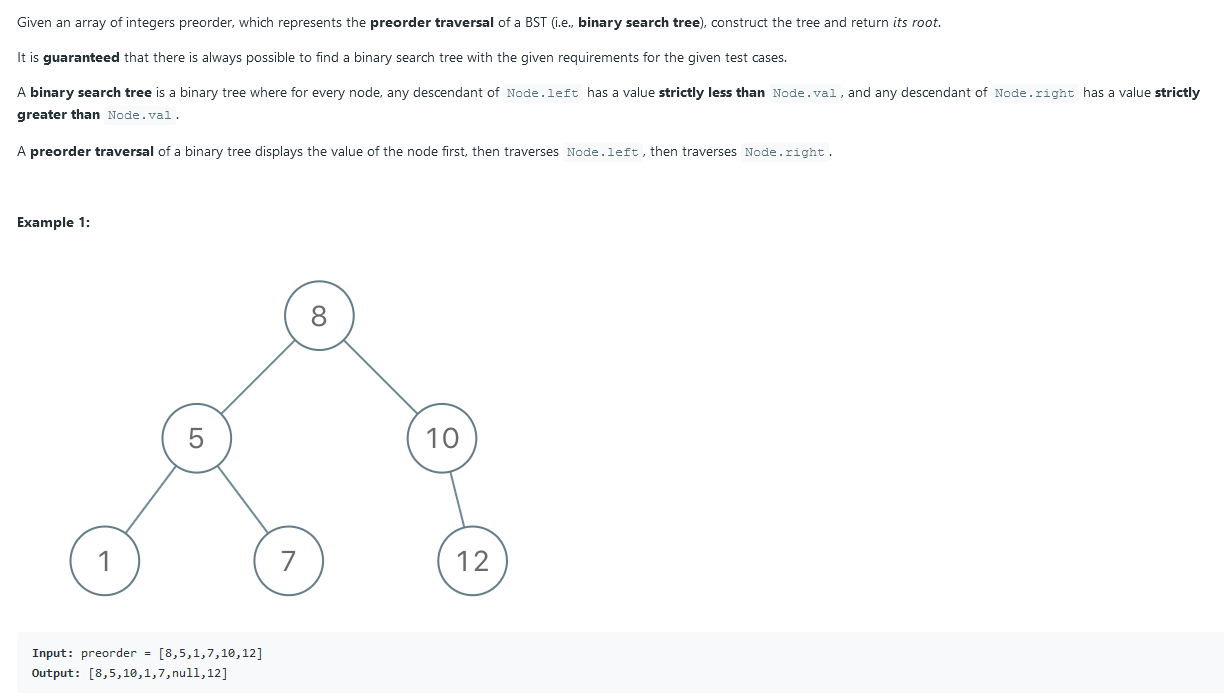

In [ ]:
from typing import List

class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def bst_from_preorder(preorder: List[int]):
    if not preorder:
        return None
    node = TreeNode(preorder[0])
    # Find right side - the first node that's larger than root
    right = 1
    while right < len(preorder):
        if preorder[right] > preorder[0]:
            # Found our right side
            break
        right += 1
    node.left = bst_from_preorder(preorder[1:right])
    node.right = bst_from_preorder(preorder[right:])
    return node


def level_order_traversal(root):
  """
    Traverse tree by tree level
  """
  nodes = []
  stack = [root]
  while stack:
    # Pop first element from a tree
    node = stack.pop(0)
    # Append node value to thre result 
    nodes.append(node.val if node else None)
    if node and (node.left or node.right):
        stack.extend([node.left, node.right])
  return nodes

In [ ]:
preorder = [8,5,1,7,10,12]

tree = bst_from_preorder(preorder)
print(level_order_traversal(tree))

[8, 5, 10, 1, 7, None, 12]


**20. Leftmost column with atleast a one**

(This problem is an interactive problem.)

A row-sorted binary matrix means that all elements are 0 or 1 and each row of the matrix is sorted in non-decreasing order.

Given a row-sorted binary matrix binaryMatrix, return the index (0-indexed) of the leftmost column with a 1 in it. If such an index does not exist, return -1.

You can't access the Binary Matrix directly. You may only access the matrix using a BinaryMatrix interface:

    BinaryMatrix.get(row, col) returns the element of the matrix at index (row, col) (0-indexed).
    BinaryMatrix.dimensions() returns the dimensions of the matrix as a list of 2 elements [rows, cols], which means the matrix is rows x cols.

Submissions making more than 1000 calls to BinaryMatrix.get will be judged Wrong Answer. Also, any solutions that attempt to circumvent the judge will result in disqualification.

For custom testing purposes, the input will be the entire binary matrix mat. You will not have access to the binary matrix directly.

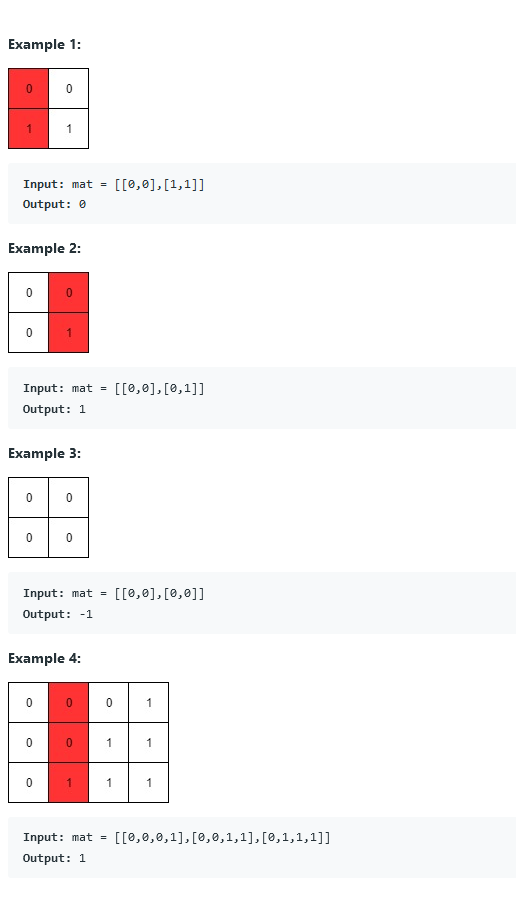

In [ ]:
from typing import List

def left_most_column_with_one(matrix: List[List[int]]) -> int:
  result = -1
  row = len(matrix) - 1
  column = len(matrix[0]) - 1
  while row >= 0 and column >= 0:
    # if column has value 1 iterate over column 
    if matrix[row][column] == 1:
      result = column
      column -= 1
    else:
      # Otherwise moved up to the next row
      row -= 1
  return result 

In [ ]:
matrix1 = [[0,0],[1,1]]
matrix2 = [[0,0],[0,1]]
matrix3 = [[0,0],[0,0]]
matrix4 = [[0,0,0,1],[0,0,1,1],[0,1,1,1]]

print(f'Output: {left_most_column_with_one(matrix1):>2}')
print(f'Output: {left_most_column_with_one(matrix2):>2}')
print(f'Output: {left_most_column_with_one(matrix3):>2}')
print(f'Output: {left_most_column_with_one(matrix4):>2}')

Output:  0
Output:  1
Output: -1
Output:  1


**21. Subarray sum equals K**

Given an array of integers nums and an integer k, return the total number of continuous subarrays whose sum equals to k.

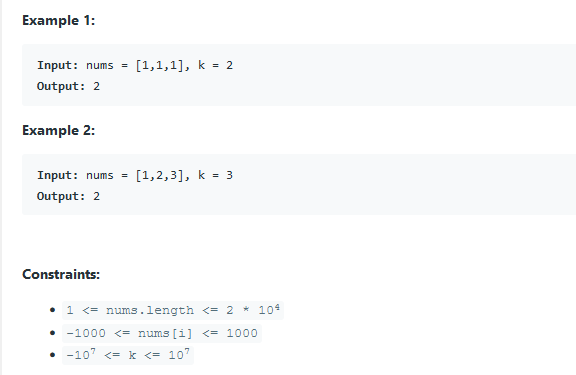

In [ ]:
# Logic
# Iterate over the array and keep a track of sum of all the encountered elements (prefix sum). Let's call it as currentSum. Whenever, we find currentSum == k, we have found a required subarray.
# While iterating, also keep a track of all the currentSum which is calculated. This is done because at any point if currentSum exceeds k then we can check whether currentSum - k has already been found or not. 
# If it does then we have found more subarrays.

def subarray_sum(array: List[int], k: int):
  current_sum = 0
  subarrays_count = 0 
  hashmap = {}
  for num in array:
    current_sum += num
    if current_sum == k:
      subarrays_count += 1
    if current_sum - k in hashmap:
      subarrays_count += hashmap[current_sum - k]

    if current_sum in hashmap:
      hashmap[current_sum] += 1
    else:
      hashmap[current_sum] = 1
  return subarrays_count

In [ ]:
array1 = [1,1,1]
k1 = 2

array2 = [1,2,3]
k2 = 3

print(f'Output: {subarray_sum(array1, k1)}')
print(f'Output: {subarray_sum(array2, k2)}')

Output: 2
Output: 2


**22.Bitwise and of Numbers Range**

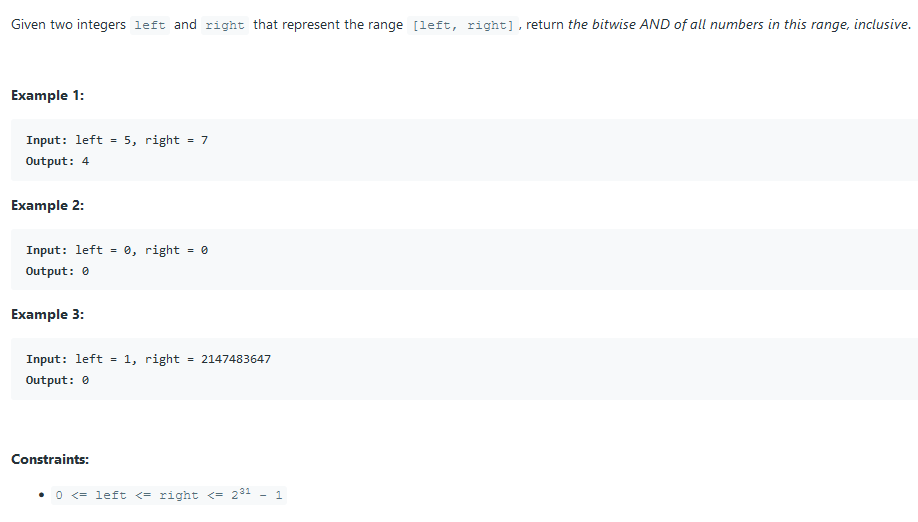

In [ ]:
def range_bitwise_and(m: int, n: int) -> int:
  shift = 0   
  # find the common 1-bits
  while m != n:
      m = m >> 1
      n = n >> 1
      shift += 1
  return m << shift

In [ ]:
print(range_bitwise_and(9, 12))
print(range_bitwise_and(5, 7))
print(range_bitwise_and(0, 0))
print(range_bitwise_and(1, 2147483647))

8
4
0
0


**23.LRU cache**

Design a data structure that follows the constraints of a Least Recently Used (LRU) cache.

Implement the LRUCache class:

    LRUCache(int capacity) Initialize the LRU cache with positive size capacity.
    int get(int key) Return the value of the key if the key exists, otherwise return -1.
    void put(int key, int value) Update the value of the key if the key exists. Otherwise, add the key-value pair to the cache. If the number of keys exceeds the capacity from this operation, evict the least recently used key.

The functions get and put must each run in O(1) average time complexity.


Example 1:
```
Input
["LRUCache", "put", "put", "get", "put", "get", "put", "get", "get", "get"]
[[2], [1, 1], [2, 2], [1], [3, 3], [2], [4, 4], [1], [3], [4]]
Output
[null, null, null, 1, null, -1, null, -1, 3, 4]

Explanation
LRUCache lRUCache = new LRUCache(2);
lRUCache.put(1, 1); // cache is {1=1}
lRUCache.put(2, 2); // cache is {1=1, 2=2}
lRUCache.get(1);    // return 1
lRUCache.put(3, 3); // LRU key was 2, evicts key 2, cache is {1=1, 3=3}
lRUCache.get(2);    // returns -1 (not found)
lRUCache.put(4, 4); // LRU key was 1, evicts key 1, cache is {4=4, 3=3}
lRUCache.get(1);    // return -1 (not found)
lRUCache.get(3);    // return 3
lRUCache.get(4);    // return 4
```



In [ ]:
from collections import OrderedDict

class LRUCache:

  def __init__(self, capacity: int):
    self.capacity = capacity
    self.hashmap = OrderedDict()

  def get(self, key: int) -> int:
    """
      Get the key of the cache
    """
    # Check if key is already in OrderedDictioanry and move it to the end
    # as the most recent
    if key in self.hashmap:
      self.hashmap.move_to_end(key)
      return self.hashmap[key]
    return -1

  def put(self, key: int, value: int) -> None:
    """
      Insert value to the cache
    """
    # Check if key is already in OrderedDictioanry and move it to the end
    # as the most recent
    if key in self.hashmap:
      self.hashmap.move_to_end(key)
    self.hashmap[key] = value
    # if hashmap exceeds the capacity remove the least frequent element
    if len(self.hashmap) > self.capacity:    
      self.hashmap.popitem(last=False)

In [ ]:
lru_cache = LRUCache(2)
lru_cache.put(1, 1)
lru_cache.put(2, 2)
print(lru_cache.get(1))
lru_cache.put(3, 3)
print(lru_cache.get(2))
lru_cache.put(4, 4)
print(lru_cache.get(1))
print(lru_cache.get(3))
print(lru_cache.get(4))
print(lru_cache.hashmap)

1
-1
-1
3
4
OrderedDict([(3, 3), (4, 4)])


**24.Jump game**

You are given an integer array nums. You are initially positioned at the array's first index, and each element in the array represents your maximum jump length at that position.

Return true if you can reach the last index, or false otherwise.

Example 1:
```
Input: nums = [2,3,1,1,4]
Output: true
Explanation: Jump 1 step from index 0 to 1, then 3 steps to the last index.
```
Example 2:
```
Input: nums = [3,2,1,0,4]
Output: false
Explanation: You will always arrive at index 3 no matter what. Its maximum jump length is 0, which makes it impossible to reach the last index.
```




In [ ]:
def can_jump(nums: list) -> bool:
  reachable = 0

  for indx, num in enumerate(nums):
    # Iterate over each element and get the most reachable element 
    if reachable < indx:
      return False
    reachable = max(reachable, indx + nums[indx])
  return True

In [ ]:
nums1 = [2,3,1,1,4]
nums2 = [3,2,1,0,4]

print(can_jump(nums1))
print(can_jump(nums2))

True
False


**25.Longest common subsequence**

Given two strings text1 and text2, return the length of their longest common subsequence. If there is no common subsequence, return 0.

A subsequence of a string is a new string generated from the original string with some characters (can be none) deleted without changing the relative order of the remaining characters.

    For example, "ace" is a subsequence of "abcde".

A common subsequence of two strings is a subsequence that is common to both strings.

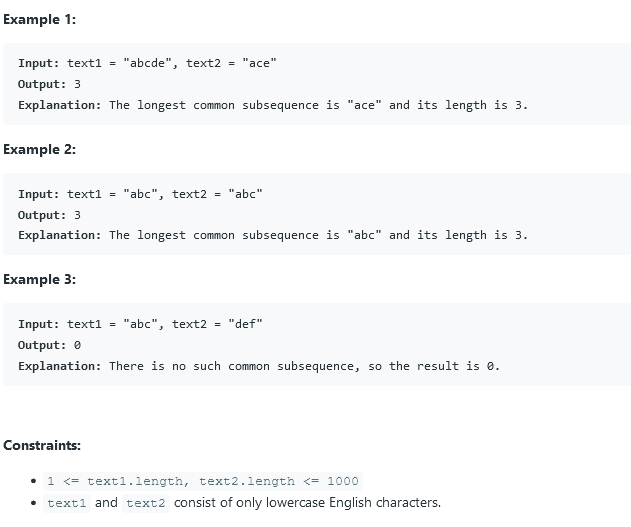

In [10]:
# DP solution O(N^2)

def longest_common_subseq(text1: str, text2: str) -> int:
  """
    Find the longest common subsequence
  """
  length_text1 = len(text1)
  length_text2 = len(text2)
  # Generate empty DP table
  table = [[0 for i in range(length_text2+1)]for j in range(length_text1+1)]

  for row in range(1, length_text1+1):
    for column in range(1, length_text2+1):

      if text1[row-1] == text2[column-1]:
        # Get the value frm the diagonal above + 1
        table[row][column] = 1 + table[row-1][column-1]
      else:
        # In case, characters doesn't match, get the max value of
        # up and right value in the DP table 
        table[row][column] = max(table[row-1][column], table[row][column-1])
  return table[-1][-1]

In [9]:
print(longest_common_subseq(text1="abcde", text2="ace"))
print(longest_common_subseq(text1 = "abc", text2 = "abc"))
print(longest_common_subseq(text1 = "abc", text2 = "def"))

3
3
0


**26.Maximal square**

Given an m x n binary matrix filled with 0's and 1's, find the largest square containing only 1's and return its area.

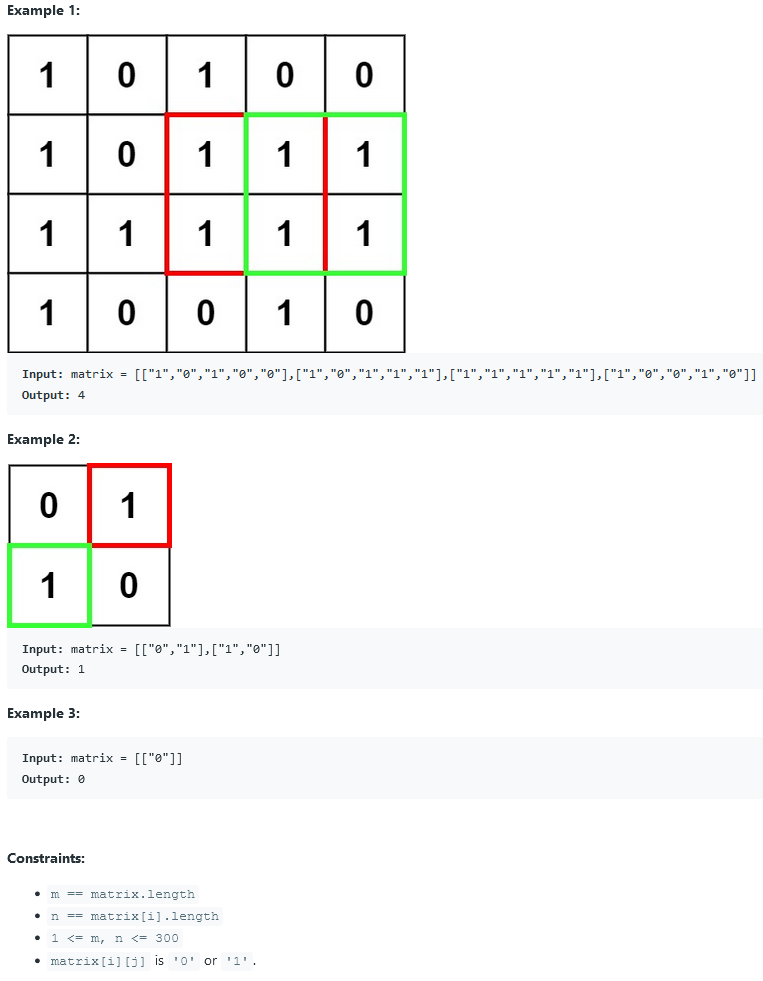

In [27]:
from typing import List

def max_square(matrix: List[List[str]])-> List[int]:
  if not matrix or not matrix[0]:
    return 0

  row_size = len(matrix)
  column_size = len(matrix[0])
  largest = 0

  # Initialize DP table
  dp = [[0 for j in range(column_size+1)] for i in range(row_size+1)]

  # Iterate over each row and column
  for row in range(1,row_size+1):
    for column in range(column_size+1):
      # if up in the diagonal is equal 1 then compare the value in 3 direction
      if matrix[row-1][column-1] == "1":
        dp[row][column] = 1 + min(dp[row-1][column], dp[row][column-1],
                                  dp[row-1][column-1])
        largest = dp[row][column] if largest < dp[row][column] else largest
  return largest * largest


In [26]:
matrix1 = [["0","1"],["1","0"]]
matrix2 = [["1","0","1","0","0"],["1","0","1","1","1"],["1","1","1","1","1"],["1","0","0","1","0"]]
matrix3 = []
matrix4 = [[], []]

print(max_square(matrix1))
print(max_square(matrix2))
print(max_square(matrix3))
print(max_square(matrix4))


1
4
0
0


**27.First unique number**

You have a queue of integers, you need to retrieve the first unique integer in the queue.

Implement the FirstUnique class:

    FirstUnique(int[] nums) Initializes the object with the numbers in the queue.
    int showFirstUnique() returns the value of the first unique integer of the queue, and returns -1 if there is no such integer.
    void add(int value) insert value to the queue.

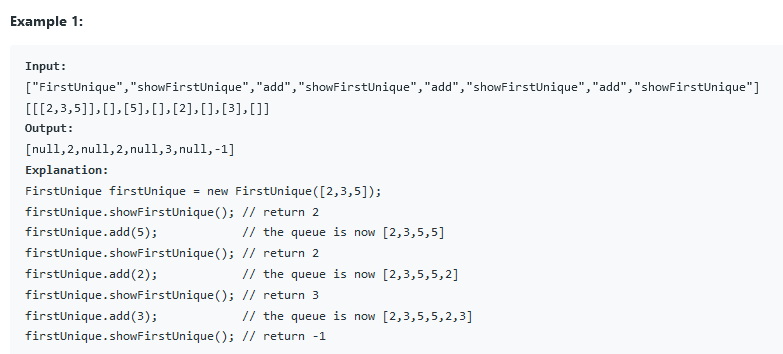

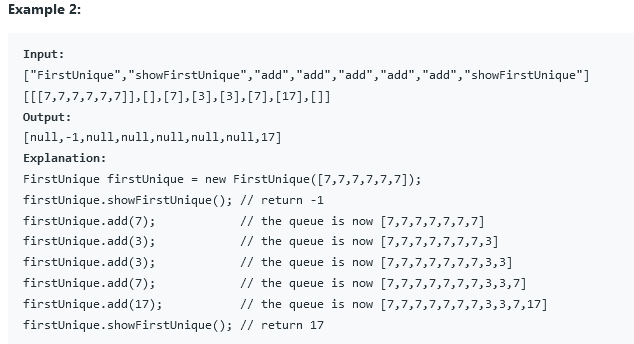

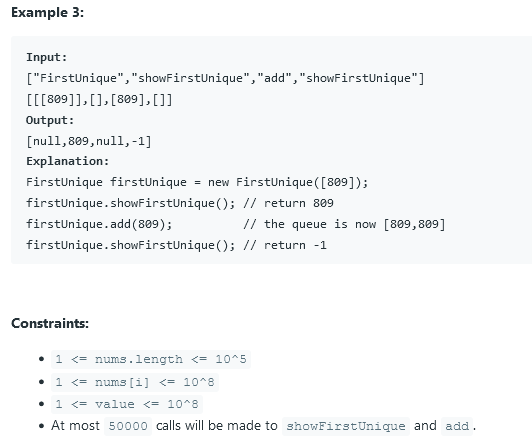

In [39]:
class FirstUnique:
  def __init__(self, nums: list):
    self.nums = nums
    self.queue = nums[:]
    self.hashmap_count = dict()

    for num in nums:
      if self.hashmap_count.get(num):
        self.hashmap_count[num] += 1
      else:
        self.hashmap_count[num] = 1

  def show_first_unique(self):
    """
      Return first unique value in an array
    """
    while self.queue:
      if self.hashmap_count[self.queue[0]] > 1:
        self.queue.pop(0)
        continue
      return self.queue[0]
    return -1

  def add_num(self, value: int) -> None:
    self.nums.append(value)
    if self.hashmap_count.get(value):
      self.hashmap_count[value] += 1
    else:
      self.hashmap_count[value] = 1
      self.queue.append(value)

In [44]:
first_unique = FirstUnique([2,3,5])
print(first_unique.show_first_unique())
first_unique.add_num(5)
print(first_unique.show_first_unique())
first_unique.add_num(2)
print(first_unique.show_first_unique())
first_unique.add_num(3)
print(first_unique.show_first_unique())

2
2
3
-1


In [42]:
first_unique = FirstUnique([7,7,7,7,7,7])
print(first_unique.show_first_unique())
first_unique.add_num(7)
first_unique.add_num(3)
first_unique.add_num(3)
first_unique.add_num(7)
first_unique.add_num(17)
print(first_unique.show_first_unique())

-1
17


In [43]:
first_unique = FirstUnique([809])
print(first_unique.show_first_unique())
first_unique.add_num(809)
print(first_unique.show_first_unique())

809
-1


**28.Binary tree maximum path sum**

A path in a binary tree is a sequence of nodes where each pair of adjacent nodes in the sequence has an edge connecting them. A node can only appear in the sequence at most once. Note that the path does not need to pass through the root.

The path sum of a path is the sum of the node's values in the path.

Given the root of a binary tree, return the maximum path sum of any non-empty path.

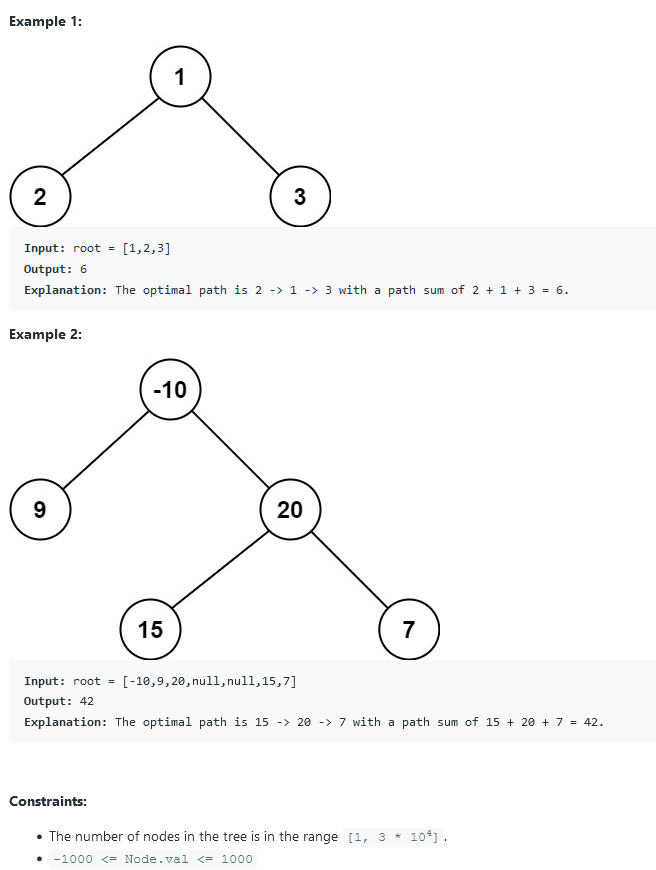

In [147]:
from typing import List

class TreeNode:
  def __init__(self, val=0, left=None, right=None):
      self.val = val
      self.left = left
      self.right = right
      
  @classmethod
  def insert_level_order(cls, arr, root,  i):
    """
      Function to insert nodes in level order
    """   
    # Base case for recursion
    if i < len(arr) and arr[i] is not None:
        root = TreeNode(arr[i])
        # insert left child
        root.left = cls.insert_level_order(arr, root.left, 2 * i + 1)

        # insert right child
        root.right = cls.insert_level_order(arr, root.right, 2 * i + 2)
    return root

def max_path_sum(root: TreeNode) -> int:
  global result 
  # Check if root value is None
  if not root:
    return 0

  left = max_path_sum(root.left)   
  right = max_path_sum(root.right) 
  # print("First condition:", left, right, result)
  max_straight = max(max(left, right) + root.val, root.val) # Case 1
  max_case_val = max(max_straight, left + right + root.val) # Case 2 & 1 compared
  result = max(max_case_val, result) # Case 3
  # print("Second condition:", max_straight, max_case_val, result)
  return max_straight

In [79]:
# Construct a complete binary tree from given array in level order fashion
root = TreeNode.insert_level_order([-10, 9, 20, None, None, 15, 7], None, 0)

print(root.val)
print(root.left.val)
print(root.right.val)
# print(root.left.left.val)
# print(root.left.right.val)
print(root.right.left.val)
print(root.right.right.val)

-10
9
20
15
7


In [119]:
# Find Binary tree maximum path sum
result = float("-inf")
max_path_sum(root)
print(f'Binary tree maximum path sum: {result}')

Binary tree maximum path sum: 42


**29.Validate sequence from root to leaf in a binary tree**

Given a binary tree where each path going from the root to any leaf form a valid sequence, check if a given string is a valid sequence in such binary tree. 

We get the given string from the concatenation of an array of integers arr and the concatenation of all values of the nodes along a path results in a sequence in the given binary tree.

 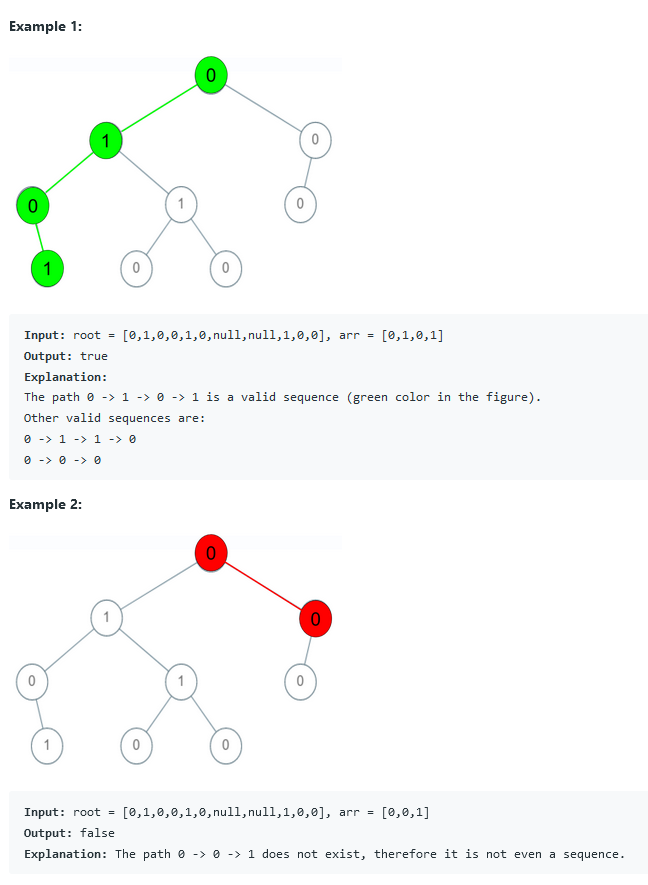
 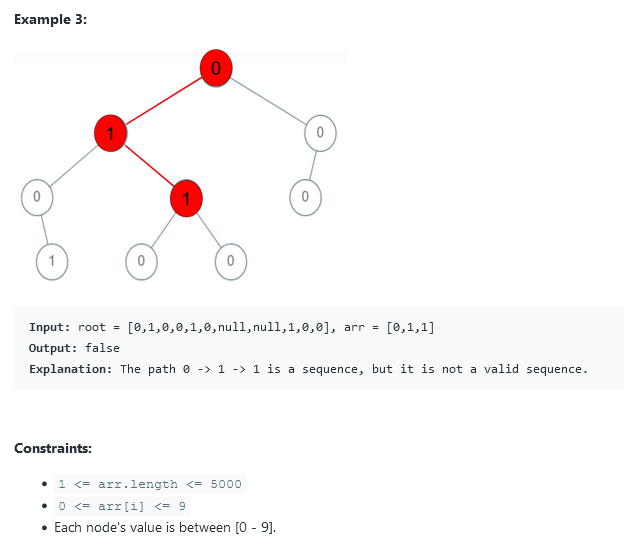

In [158]:
def is_valid_sequence(root: TreeNode, pos: int, array: list) -> bool:
  """
    Check If a String Is a Valid Sequence from Root to Leaves Path
    in a Binary Tree
  """
  array_size = len(array) - 1
  # Check if root node is not None
  # pos (current index) is not outside of an array sie
  # root value is not equal current array element
  # Then return False 
  if not root or pos > array_size or root.val != array[pos] :
    return False
  # Check if there are not leaf nodes 
  # current index is the last elemnt in array 
  # and last element is equal to current node
  elif not root.left and not root.right and pos == array_size:
    return True
  
  # Otherwise continue validating the next element in Binary tree
  return (is_valid_sequence(root.left, pos+1, array)
           or is_valid_sequence(root.right, pos+1, array))

In [159]:
# Construct a complete binary tree from given array in level order fashion
tree = [0, 1, 0, 0, 1, 0 , None, None, 1, 0 ,0]
# tree = [0, 1, 0, 0, 1, None, 1, 0, None, None, 1, 0, 0]

array1 = [0, 1, 0, 1]
array2 = [0, 0, 1]
array3 = [0, 1, 1]

root = TreeNode.insert_level_order(tree, None, 0)
print(root.val)
print(root.left.val)
print(root.right.val)
print(root.left.left.val)
print(root.left.left.right.val)
print(root.left.right.val)
print(root.left.right.left.val)
print(root.left.right.right.val)
print(root.right.left.val)

0
1
0
0
1
1
0
0
0


In [160]:
print(is_valid_sequence(root, 0, array1))
print(is_valid_sequence(root, 0, array2))
print(is_valid_sequence(root, 0, array3))

True
False
False
